# Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Reading CSV File(Loading Dataset)

In [17]:
df=pd.read_csv("HeartAttack.csv",na_values='?')

In [18]:
df.head()  #Top 5 Rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [19]:
df.columns       #Features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [20]:
df.tail()          #Last 5 Rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1
293,65,1,4,130.0,275.0,0.0,1.0,115.0,1.0,1.0,2.0,NaN,NaN,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [22]:
df.shape

(294, 14)

In [23]:
df.isnull().sum()              #Calculating Null Values

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [27]:
df=df.drop(columns=["slope","ca","thal"],axis=1)                  #dropping the features with no importance

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [30]:
df=df.dropna()                                   #dropping the rows with any feature having NA value

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         261 non-null    int64  
 1   sex         261 non-null    int64  
 2   cp          261 non-null    int64  
 3   trestbps    261 non-null    float64
 4   chol        261 non-null    float64
 5   fbs         261 non-null    float64
 6   restecg     261 non-null    float64
 7   thalach     261 non-null    float64
 8   exang       261 non-null    float64
 9   oldpeak     261 non-null    float64
 10  num         261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


In [34]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [35]:
df["sex"].value_counts()

1    192
0     69
Name: sex, dtype: int64

In [36]:
df["cp"].value_counts()

4    113
2     92
3     46
1     10
Name: cp, dtype: int64

In [37]:
df["fbs"].value_counts()

0.0    242
1.0     19
Name: fbs, dtype: int64

# Dummies Using Pandas To Convert Categorical Value To One-Hot Encoding

In [38]:
df=pd.get_dummies(df,columns=["cp","restecg"])

In [51]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,0,1,0,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,0,1,0,0,1,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,1,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,0,1,0,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,0,1,0,0,1,0,0


In [53]:
numerical_cols=["age","trestbps","chol","thalach"]
cat_cols=list(set(df.columns) - set(numerical_cols)-{"target"})

In [54]:
df["oldpeak"].value_counts()

0.0    165
1.0     36
2.0     28
1.5     15
3.0      9
2.5      3
0.5      2
0.8      1
4.0      1
5.0      1
Name: oldpeak, dtype: int64

In [55]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0'],
      dtype='object')

In [56]:
df=df.rename(columns = {"num       ":"target"})

In [57]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,0,1,0,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,0,1,0,0,1,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,1,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,0,1,0,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,0,1,0,0,1,0,0


In [58]:
cat_cols

['fbs',
 'cp_1',
 'exang',
 'restecg_2.0',
 'restecg_1.0',
 'restecg_0.0',
 'sex',
 'cp_2',
 'cp_4',
 'oldpeak',
 'cp_3']

In [59]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach']

In [68]:
outliers=[]                 #finding outliers using Z-score
def detect_outliers(df):
    
    threshold=2
    mean = np.mean(df)
    std =np.std(df)
    
    
    for i in df:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [69]:
outlier_pt=detect_outliers(df['chol'])       #finding outliers in the feature chol of the dataset , keeping threshold value = 2

In [70]:
outlier_pt

[412.0,
 100.0,
 394.0,
 85.0,
 117.0,
 529.0,
 392.0,
 603.0,
 404.0,
 518.0,
 388.0,
 491.0,
 393.0]

In [71]:
df.chol.value_counts(normalize=True)

230.0    0.019157
246.0    0.019157
215.0    0.015326
260.0    0.015326
216.0    0.015326
           ...   
100.0    0.003831
210.0    0.003831
129.0    0.003831
168.0    0.003831
393.0    0.003831
Name: chol, Length: 150, dtype: float64

# Plotting different type of graphs to analyze the features

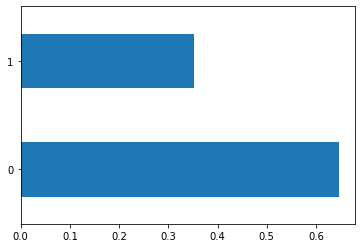

In [80]:
df.cp_2.value_counts(normalize=True).plot.barh()
plt.show()


In [81]:
df.cp_2.value_counts(normalize=True)

0    0.64751
1    0.35249
Name: cp_2, dtype: float64

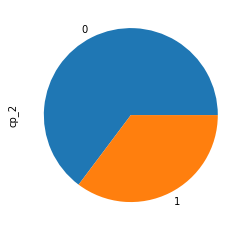

In [82]:
df.cp_2.value_counts(normalize=True).plot.pie()
plt.show()

In [85]:
df.cp_2.describe()

count    261.000000
mean       0.352490
std        0.478664
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: cp_2, dtype: float64

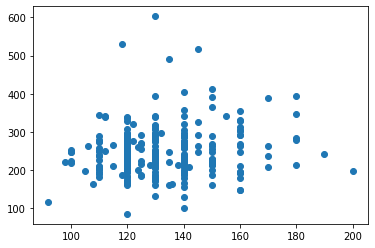

In [89]:
plt.scatter(df.trestbps,df.chol)
plt.show()

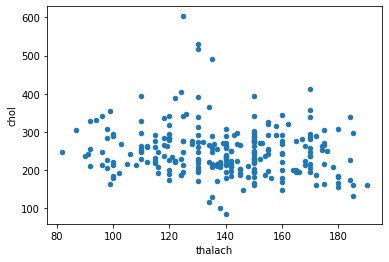

In [91]:
df.plot.scatter(x="thalach",y="chol")
plt.show()

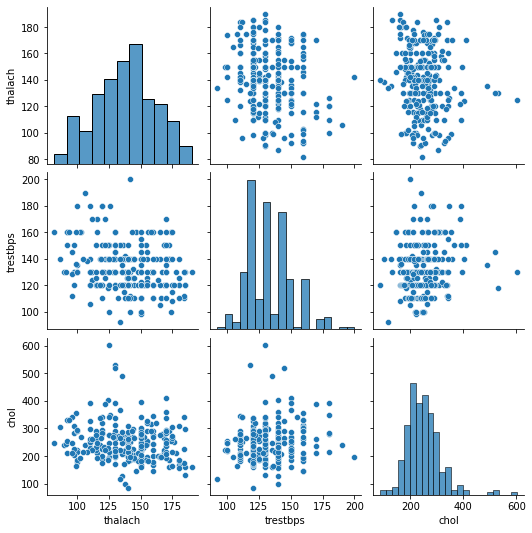

In [92]:
sns.pairplot(data = df, vars=['thalach','trestbps','chol'])
plt.show()

In [93]:
df[['thalach','trestbps','chol']].corr()

,thalach,trestbps,chol
thalach,1.000000,-0.220708,-0.136292
trestbps,-0.220708,1.000000,0.116890
chol,-0.136292,0.116890,1.000000


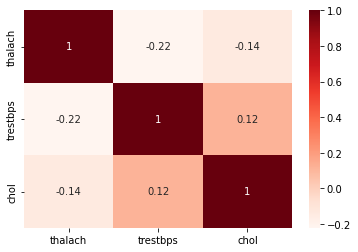

In [94]:
sns.heatmap(df[['thalach','trestbps','chol']].corr(), annot=True, cmap = 'Reds')
plt.show()

C:\Users\USER\anaconda3\envs\heart\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol', ylabel='count'>

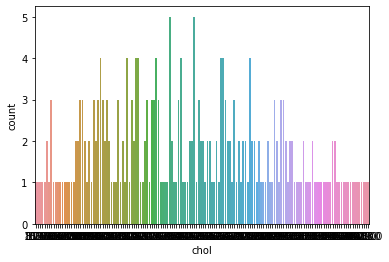

In [95]:
sns.countplot(df.chol)

C:\Users\USER\anaconda3\envs\heart\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp_2', ylabel='count'>

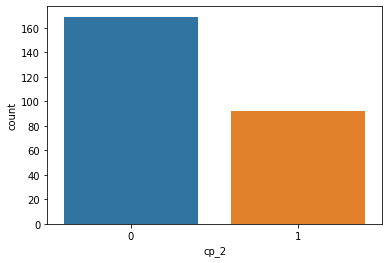

In [97]:
sns.countplot(df.cp_2)

C:\Users\USER\anaconda3\envs\heart\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

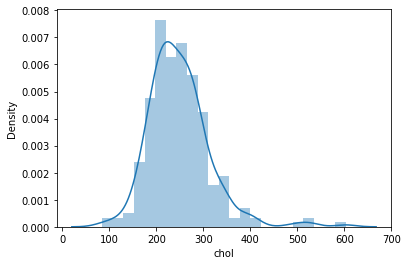

In [98]:
sns.distplot(df.chol)

C:\Users\USER\anaconda3\envs\heart\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cp_2', ylabel='Density'>

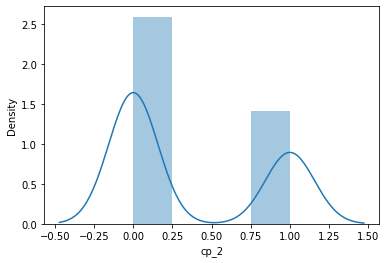

In [100]:
sns.distplot(df.cp_2)

In [101]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,132.639847,248.823755,0.072797,139.226054,0.318008,0.612261,0.375479,0.038314,0.352490,0.176245,0.432950,0.796935,0.180077,0.022989
std,7.842244,0.441843,17.709857,65.667985,0.260302,23.757401,0.466597,0.931914,0.485177,0.192322,0.478664,0.381761,0.496436,0.403053,0.384990,0.150155
min,28.000000,0.000000,92.000000,85.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,120.000000,208.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,49.000000,1.000000,130.000000,242.000000,0.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,54.000000,1.000000,140.000000,280.000000,0.000000,155.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,65.000000,1.000000,200.000000,603.000000,1.000000,190.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df.head(10)        #Top 10 Rows

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,0,1,0,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,0,1,0,0,1,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,1,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,0,1,0,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,0,1,0,0,1,0,0
6,32,1,110.0,225.0,0.0,184.0,0.0,0.0,0,0,1,0,0,1,0,0
7,32,1,125.0,254.0,0.0,155.0,0.0,0.0,0,0,1,0,0,1,0,0
8,33,1,120.0,298.0,0.0,185.0,0.0,0.0,0,0,0,1,0,1,0,0
9,34,0,130.0,161.0,0.0,190.0,0.0,0.0,0,0,1,0,0,1,0,0
10,34,1,150.0,214.0,0.0,168.0,0.0,0.0,0,0,1,0,0,0,1,0


# Splitting Data Into Train And Test Split

In [103]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [104]:
len(df_train)

208

In [105]:
len(df_test)

53

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()                  #Applying StandardScaler()

def get_features_and_target_arrays(df,numerical_cols,cat_cols,scaler):
    x_numeric_scaled=scaler.fit_transform(df[numerical_cols])   #numeric columns
    x_categorical=df[cat_cols].to_numpy()                       #categorical columns
    x=np.hstack((x_categorical, x_numeric_scaled))
    y=df["target"]
    
    return x,y

In [139]:
x_train,y_train=get_features_and_target_arrays(df_train,cat_cols,numerical_cols,scaler)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
clf=LogisticRegression()              #Train
clf.fit(x_train,y_train)              #Fitting the Dataset into Logistic Regression Model

C:\Users\USER\anaconda3\envs\heart\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [142]:
x_test,y_test=get_features_and_target_arrays(df_test,cat_cols,numerical_cols,scaler)

In [143]:
test_pred_logistic=clf.predict(x_test)

In [144]:
from sklearn.metrics import mean_squared_error ,accuracy_score

In [145]:
mean_squared_error(y_test,test_pred_logistic)      #Calculating mean_squared_error for Logistic Regression Model

0.16981132075471697

In [146]:
accuracy_score(y_test,test_pred_logistic)          #Calculating accuracy_score for Logistic Regression Model

0.8301886792452831

In [147]:
from sklearn.metrics import confusion_matrix           

In [148]:
confusion_matrix(y_test,test_pred_logistic)           #confusion_matrix for Logistic Regression Model

array([[28,  5],
       [ 4, 16]], dtype=int64)

In [149]:
from sklearn import svm

In [150]:
svm_clf = svm.SVC(kernel='linear')               #Train

In [151]:
svm_clf.fit(x_train,y_train)                     #Fitting the Dataset into SVM Model

SVC(kernel='linear')

In [152]:
test_pred_svm=svm_clf.predict(x_test)

In [153]:
mean_squared_error(y_test,test_pred_svm)           #Calculating mean_squared_error for SVM Model

0.3018867924528302

In [154]:
accuracy_score(y_test,test_pred_svm)           #Calculating accuracy_score for SVM Model

0.6981132075471698

In [155]:
confusion_matrix(y_test,test_pred_svm)          #confusion_matrix for SVM Model

array([[27,  6],
       [10, 10]], dtype=int64)